In [1]:
import sys
import numpy as np
import copy

In [2]:
import abie
from wh import WisdomHolman

In [3]:
t_end = 200

In [4]:
np.random.uniform(low=0.1, high=1.5)

0.6912804474678341

In [5]:
sim = abie.ABIE(name='planetesimal_nb')
sim.integrator = 'WisdomHolman'
# sim.integrator = 'GaussRadau15'
me_ms = 3.e-6


sim.add(mass=1.0, pos=(0.0, 0.0, 0.0), vel=(0.0, 0.0, 0.0), name='star')
for i in range(100):
    sim.add(mass=1.e-8, a=np.random.uniform(low=0.1, high=1.5), e=np.random.uniform(low=0.0, high=0.05), i=np.random.uniform(low=0.0, high=np.radians(10)), name=('planet%d' % i), primary='star')
    
print(sim.particles)  

# save a copy of the initial state of particles (to compare with the neural integrator)
particles_init = copy.deepcopy(sim.particles)

Selecting WisdomHolman as the active integrator.
Total number of particles: 101
Particle(m=1, x=0, y=0, z=0, vx=0, vy=0, vz=0, r=0, name='star', hash=967139671)
Particle(m=1e-08, x=-1.408, y=-0.0583641, z=-0.0101638, vx=0.225684, vy=-5.13597, vz=-0.894401, r=0, name='planet0', hash=319568547)
Particle(m=1e-08, x=-0.728907, y=-0.0306403, z=-0.00132905, vx=0.317132, vy=-7.1594, vz=-0.310546, r=0, name='planet1', hash=679461217)
Particle(m=1e-08, x=-0.727401, y=-0.0301409, z=-0.0053143, vx=0.314416, vy=-7.13323, vz=-1.2577, r=0, name='planet2', hash=831427663)
Particle(m=1e-08, x=-1.09284, y=-0.0456948, z=-0.00513137, vx=0.254869, vy=-5.91053, vz=-0.663732, r=0, name='planet3', hash=653035808)
Particle(m=1e-08, x=-1.08906, y=-0.0457246, z=-0.00299512, vx=0.255414, vy=-5.94288, vz=-0.389279, r=0, name='planet4', hash=409081188)
Particle(m=1e-08, x=-0.338121, y=-0.0142203, z=-0.000424653, vx=0.459715, vy=-10.6528, vz=-0.31812, r=0, name='planet5', hash=726301611)
Particle(m=1e-08, x=-1.3659

In [6]:
# sim.integrator_warmup()
sim.h = 1
sim.store_dt = 1
sim.acceleration_method = 'ctypes'
sim.record_simulation(quantities=['a', 'ecc', 'inc', 'x', 'y', 'z', 'time', 'energy']).start()
sim.integrate(t_end)
# sim.flush()
sim.stop()

t = 1.000000, N = 101, dE/E0 = -0.0155914
t = 2.000000, N = 101, dE/E0 = -0.0156209
t = 3.000000, N = 101, dE/E0 = -0.0156218
t = 4.000000, N = 101, dE/E0 = -0.0156275
t = 5.000000, N = 101, dE/E0 = -0.0156383
t = 6.000000, N = 101, dE/E0 = -0.0156346
t = 7.000000, N = 101, dE/E0 = -0.0155934
t = 8.000000, N = 101, dE/E0 = -0.0155825
t = 9.000000, N = 101, dE/E0 = -0.0155925
t = 10.000000, N = 101, dE/E0 = -0.0155878
t = 11.000000, N = 101, dE/E0 = -0.0155822
t = 12.000000, N = 101, dE/E0 = -0.0155716
t = 13.000000, N = 101, dE/E0 = -0.0155661
t = 14.000000, N = 101, dE/E0 = -0.0155698
t = 15.000000, N = 101, dE/E0 = -0.0155656
t = 16.000000, N = 101, dE/E0 = -0.0155548
t = 17.000000, N = 101, dE/E0 = -0.0155583
t = 18.000000, N = 101, dE/E0 = -0.0155638
t = 19.000000, N = 101, dE/E0 = -0.0155525
t = 20.000000, N = 101, dE/E0 = -0.0155393
t = 21.000000, N = 101, dE/E0 = -0.0155385
t = 22.000000, N = 101, dE/E0 = -0.0155401
t = 23.000000, N = 101, dE/E0 = -0.0155401
t = 24.000000, N = 1

t = 191.000000, N = 101, dE/E0 = -0.0154239
t = 192.000000, N = 101, dE/E0 = -0.015405
t = 193.000000, N = 101, dE/E0 = -0.0154037
t = 194.000000, N = 101, dE/E0 = -0.0153987
t = 195.000000, N = 101, dE/E0 = -0.0153919
t = 196.000000, N = 101, dE/E0 = -0.015392
t = 197.000000, N = 101, dE/E0 = -0.0153969
t = 198.000000, N = 101, dE/E0 = -0.0154011
t = 199.000000, N = 101, dE/E0 = -0.0154039
t = 200.000000, N = 101, dE/E0 = -0.0154035


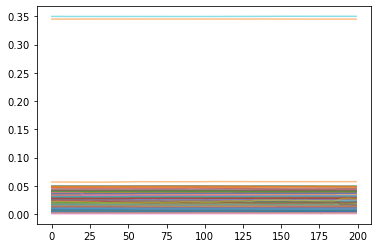

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(sim.data['ecc'][:, 1:], alpha=0.5)
plt.show()

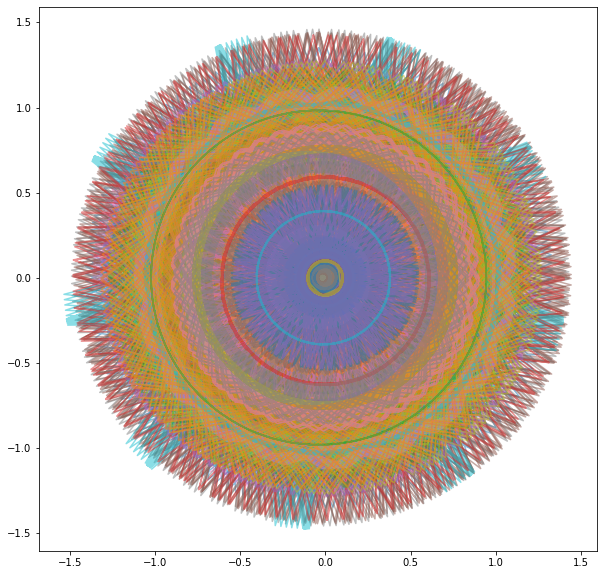

In [8]:
plt.figure(figsize=(10,10))
plt.plot(sim.data['x'][:, 1:], sim.data['y'][:, 1:], alpha=0.5)
plt.axis('equal')
plt.show()

In [9]:
# sim.buf.recorder.data.keys()

In [10]:
from nn_models import MLP
from nih import NIH
import torch
from config import CONFIG
from utils import get_model_path, get_backbone


EXPERIMENT_DIR = '.'
sys.path.append(EXPERIMENT_DIR)

def load_model(config, device):
    output_dim = 1
    nn_model = get_backbone(config['backbone'])
    print(nn_model)
    model = NIH(config['input_dim'], differentiable_model=nn_model, device=device)

    path = get_model_path()
    print(path)
    model.load_state_dict(torch.load(path, map_location=torch.device(device)))
    return model

config = CONFIG
if torch.cuda.is_available():
  device = 'cuda'
else:
  device = 'cpu'
nih_model = load_model(config, device)

MLP(
  (linear1): Linear(in_features=6, out_features=512, bias=True)
  (linear2): Linear(in_features=512, out_features=512, bias=True)
  (linear3): Linear(in_features=512, out_features=512, bias=True)
  (linear4): Linear(in_features=512, out_features=512, bias=True)
  (linear5): Linear(in_features=512, out_features=1, bias=False)
)
./model_MLP_SymmetricLog.pth


In [11]:
sim2 = WisdomHolman(hnn=nih_model, particles=particles_init)
# sim.integrator = 'WisdomHolman'


   

In [12]:
sim2.output_file = 'planetesimal_nih.hdf5'
sim2.integrator_warmup()

sim2.h = 1
sim2.acceleration_method = 'numpy'
sim2.buf.recorder.set_monitored_quantities(['a', 'ecc', 'inc', 'x', 'y', 'z'])
sim2.buf.recorder.start()
sim2.integrate(t_end, nih=True)
sim2.buf.flush()
sim2.stop()

t = 1.000000, dE/E0 = 0.0155561, N = 101
t = 2.000000, dE/E0 = 0.0155561, N = 101
t = 3.000000, dE/E0 = 0.0155563, N = 101
t = 4.000000, dE/E0 = 0.0155562, N = 101
t = 5.000000, dE/E0 = 0.015556, N = 101
t = 6.000000, dE/E0 = 0.0155562, N = 101
t = 7.000000, dE/E0 = 0.0155564, N = 101
t = 8.000000, dE/E0 = 0.015556, N = 101
t = 9.000000, dE/E0 = 0.0155562, N = 101
t = 10.000000, dE/E0 = 0.0155562, N = 101
t = 11.000000, dE/E0 = 0.0155562, N = 101
t = 12.000000, dE/E0 = 0.0155562, N = 101
t = 13.000000, dE/E0 = 0.0155561, N = 101
t = 14.000000, dE/E0 = 0.0155562, N = 101
t = 15.000000, dE/E0 = 0.0155561, N = 101
t = 16.000000, dE/E0 = 0.0155561, N = 101
t = 17.000000, dE/E0 = 0.0155563, N = 101
t = 18.000000, dE/E0 = 0.0155559, N = 101
t = 19.000000, dE/E0 = 0.0155561, N = 101
t = 20.000000, dE/E0 = 0.0155561, N = 101
t = 21.000000, dE/E0 = 0.0155562, N = 101
t = 22.000000, dE/E0 = 0.0155562, N = 101
t = 23.000000, dE/E0 = 0.015556, N = 101
t = 24.000000, dE/E0 = 0.0155564, N = 101
t = 

t = 195.000000, dE/E0 = 0.0155561, N = 101
t = 196.000000, dE/E0 = 0.0155563, N = 101
t = 197.000000, dE/E0 = 0.0155561, N = 101
t = 198.000000, dE/E0 = 0.0155561, N = 101
t = 199.000000, dE/E0 = 0.0155561, N = 101
t = 200.000000, dE/E0 = 0.0155562, N = 101


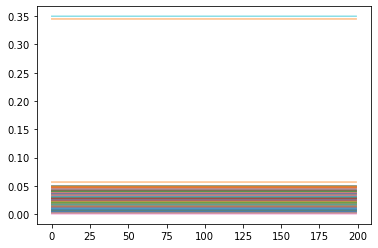

In [13]:
%matplotlib inline 
plt.plot(sim2.buf.recorder.data['ecc'][:, 1:], alpha=0.5)
plt.show()

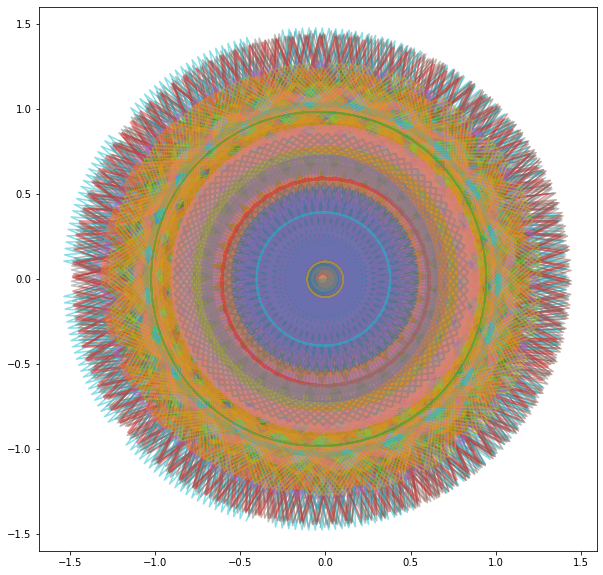

In [14]:
plt.figure(figsize=(10,10))
plt.plot(sim2.buf.recorder.data['x'][:, 1:], sim2.buf.recorder.data['y'][:, 1:], alpha=0.5)
plt.axis('equal')
plt.show()

IndexError: list index out of range

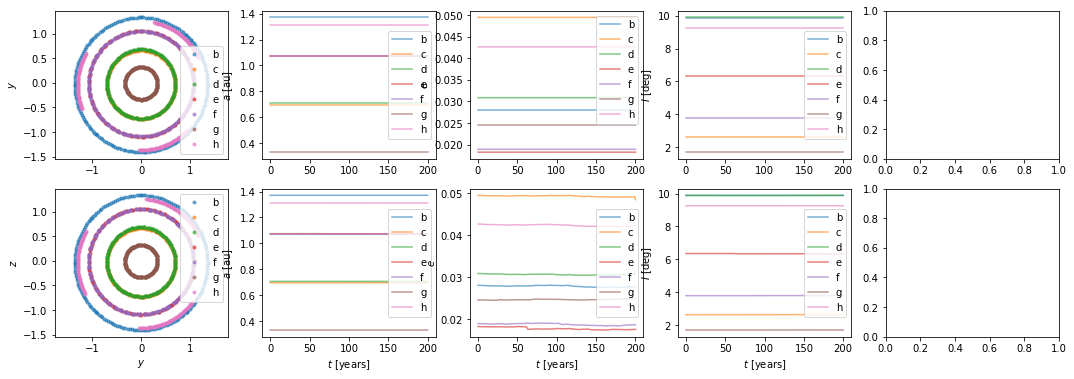

In [15]:
fig, axes = plt.subplots(2,5, figsize=(18,6))
# data_nb = sim.buf.recorder.data
data_nb = sim.data
data_nih = sim2.buf.recorder.data
t_nih = np.linspace(0, t_end, data_nih['x'].shape[0])
t_nb = np.linspace(0, t_end, data_nb['x'].shape[0])

names = ['Sun', 'b', 'c', 'd', 'e', 'f', 'g', 'h']

for i in range(1, data_nih['x'].shape[1]):
    # coordinates in the first column
    axes[0,0].plot(data_nih['y'][:,i], data_nih['x'][:,i], '.', label=names[i], alpha=0.6)
    axes[0,0].axis('equal')
    axes[0,0].set_ylabel('$y$')
    axes[0,0].legend()
    axes[1,0].plot(data_nb['y'][:,i], data_nb['x'][:,i], '.', label=names[i], alpha=0.6)
    axes[1,0].axis('equal')
    axes[1,0].set_xlabel('$y$')
    axes[1,0].set_ylabel('$z$')
    axes[1,0].legend()

    # semi-major in the second column
    axes[0,1].plot(t_nih, data_nih['a'][:,i], label=names[i], alpha=0.6)
    axes[0,1].set_ylabel('$a$ [au]')
    axes[0,1].legend()
    axes[1,1].plot(t_nb, data_nb['a'][:,i], label=names[i], alpha=0.6)
    axes[1,1].set_xlabel('$t$ [years]')
    axes[1,1].set_ylabel('$a$ [au]')
    axes[1,1].legend()
    
    # eccentricity in the second column
    axes[0,2].plot(t_nih, data_nih['ecc'][:,i], label=names[i], alpha=0.6)
    axes[0,2].set_ylabel('$e$')
    axes[0,2].legend()
    axes[1,2].plot(t_nb, data_nb['ecc'][:,i], label=names[i], alpha=0.6)
    axes[1,2].set_xlabel('$t$ [years]')
    axes[1,2].set_ylabel('$e$')
    axes[1,2].legend()
    
    # inclination in the second column
    axes[0,3].plot(t_nih, np.degrees(data_nih['inc'][:,i]), label=names[i], alpha=0.6)
    axes[0,3].set_ylabel('$I$ [deg]')
    axes[0,3].legend()
    axes[1,3].plot(t_nb, np.degrees(data_nb['inc'][:,i]), label=names[i], alpha=0.6)
    axes[1,3].set_xlabel('$t$ [years]')
    axes[1,3].set_ylabel('$I$ [deg]')
    axes[1,3].legend()
    
# energy drift in the second column
axes[0,4].plot(t_nih, sim2.energy, alpha=0.6)
axes[0,4].set_ylabel('$dE/E_0$')
axes[1,4].plot(t_nb, np.abs((data_nb['energy']-data_nb['energy'][1])/data_nb['energy'][1]), alpha=0.6)
axes[1,4].set_xlabel('$t$ [years]')
axes[1,4].set_ylabel('$dE/E_0$')

    
plt.tight_layout()
plt.savefig('planetesimals_%dyr.pdf' % t_end)